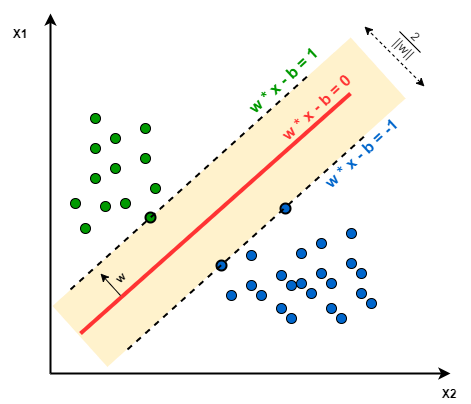

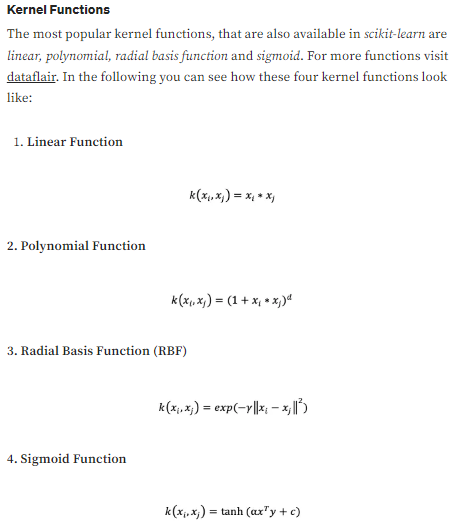

### **In its most simple type, SVM doesn’t support multiclass classification natively. It supports binary classification and separating data points into two classes. For multiclass classification, the same principle is utilized after breaking down the multiclassification problem into multiple binary classification problems.**

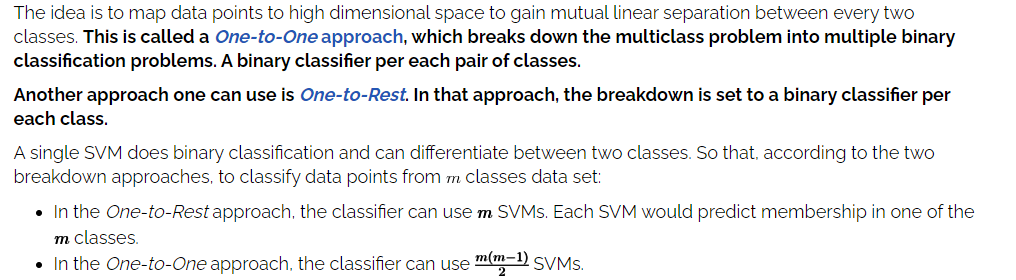

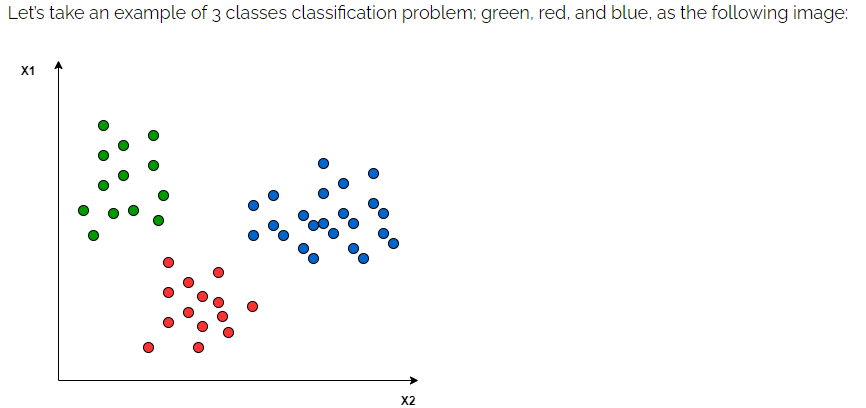

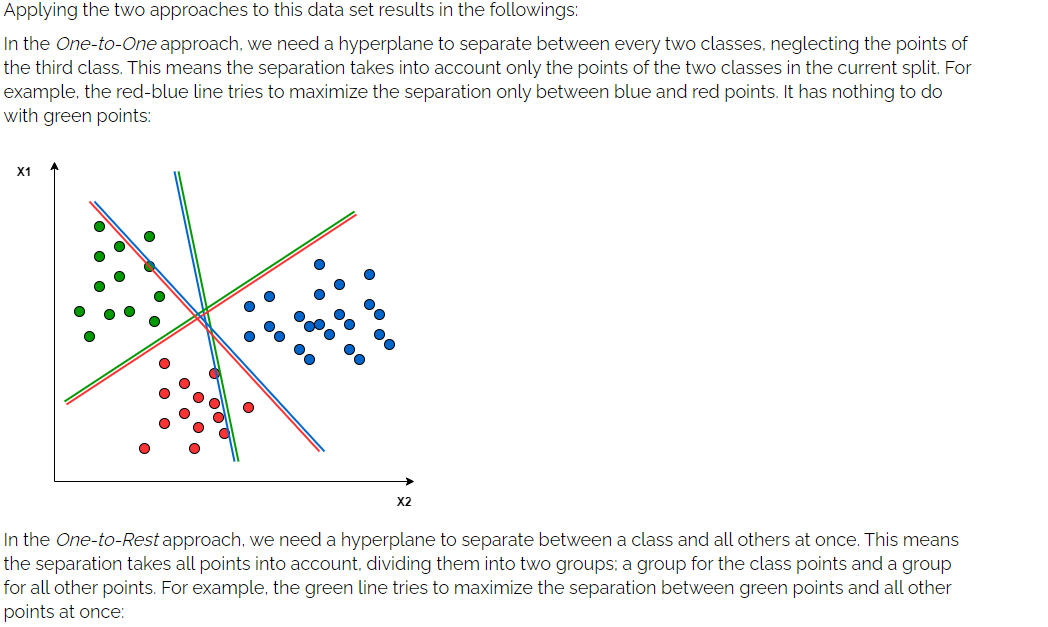

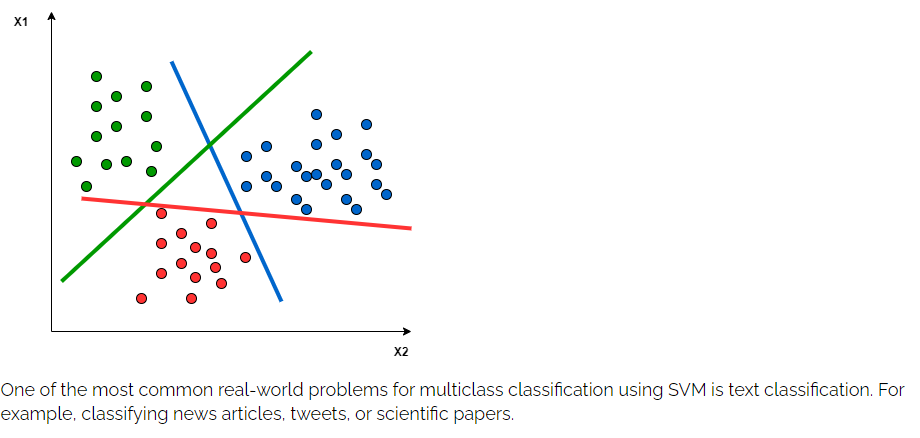

The following Python code shows an implementation for building (training and testing) a multiclass classifier (3 classes), using Python and Scikitlean library.

###  We developed two different classifiers to show the usage of two different kernel functions; Polynomial and RBF. The code also calculates the accuracy and f1 scores to show the performance difference between the two selected kernel functions on the same data set.

In this code, we use the Iris flower data set. That data set contains three classes of 50 instances each, where each class refers to a type of Iris plant.

In [2]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

#### We’ll create two objects from SVM, to create two different classifiers; one with Polynomial kernel, and another one with RBF kernel:

In [5]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [6]:
# To calculate the efficiency of the two models, we’ll test the two classifiers using the test data set:

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [7]:
# Finally, we’ll calculate the accuracy and f1 scores for SVM with Polynomial kernel:

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  70.00
F1 (Polynomial Kernel):  69.67


In [8]:
# In the same way, the accuracy and f1 scores for SVM with RBF kernel:

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.67
F1 (RBF Kernel):  76.36


For the accuracy score, it shows the percentage of the true positive and true negative to all data points. So, it’s useful when the data set is balanced.

For the f1 score, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative. So, it’s useful to calculate the f1 score when the data set isn’t balanced.

Playing around with SVM hyperparameters, like C, gamma, and degree in the previous code snippet will display different results. As we can see, in this problem, SVM with RBF kernel function is outperforming SVM with Polynomial kernel function.

For the f1 score, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative.

In [9]:
################################################################################################################################

In [10]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import cross_validate, train_test_split
import pandas as pd
from scipy.io import loadmat, savemat
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
# Load the dataset file
ThreeClassTrainingData = loadmat('ThreeClassTrainingData.mat')
ThreeClassTestData = loadmat('ThreeClassTestData.mat')

# Training and Test Dataset
X_train = ThreeClassTrainingData['X_train']
y_train = ThreeClassTrainingData['y_train']

X_test = ThreeClassTestData['X_test']
y_test = ThreeClassTestData['y_test']

In [12]:
# Prepare the training data set for One-against-All

# Split the data set into training as three sets of classes : (1&(2,3), 2&(1,3) and 3&(1,2))
X_train1 = np.vstack((X_train[:240,:], X_train[240:480,:], X_train[480:,:]))
X_train2 = np.vstack((X_train[240:480,:], X_train[:240,:], X_train[480:,:]))
X_train3 = np.vstack((X_train[480:,:], X_train[:240,:], X_train[240:480,:]))

y_train_mod = np.vstack((np.full((240,1), -1), np.ones((480,1))))

In [24]:
print(X_train1)

[[-1.72814169  0.22814542]
 [-2.04895361  0.05663025]
 [-1.86942274  0.03219218]
 ...
 [ 1.50479759  1.01079821]
 [ 1.50350024  1.20612829]
 [ 1.07420726  1.22174618]]


In [13]:
# Prepare the training data set for One-against-One

## For One-against-One ##
# Split the data set into training as th three sets of classes : (1&2, 2&3 and 1&3)
X_train12 = np.vstack((X_train[:240,:], X_train[240:480,:]))
X_train23 = np.vstack((X_train[240:480,:], X_train[480:,:]))
X_train13 = np.vstack((X_train[:240,:], X_train[480:,:]))

y_train12 = np.sign(np.vstack((y_train[:240,:], y_train[240:480,:])) - 1.5*np.ones((480,1)))
y_train23 = np.sign(np.vstack((y_train[240:480,:], y_train[480:,:])) - 2.5*np.ones((480,1)))
y_train13 = np.sign(np.vstack((y_train[:240,:], y_train[480:,:])) - 2*np.ones((480,1)))

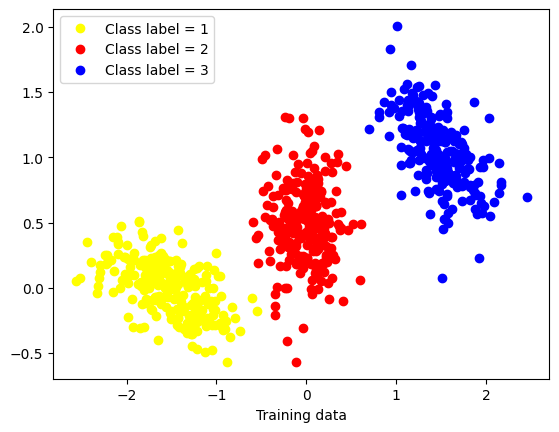

In [14]:
plt.plot(X_train[:240,0], X_train[:240,1], 'o', label='Class label = 1', color='yellow')
plt.plot(X_train[240:480,0], X_train[240:480,1], 'o', label='Class label = 2', color='red')
plt.plot(X_train[480:,0], X_train[480:,1], 'o', label='Class label = 3', color='blue')
plt.xlabel("Training data")
plt.legend(numpoints=1)

In [15]:
# Create and train the SVM models for One-against-All method

start_train_time_ova = time.time()

# For Class 1 and (2,3)
svm1 = svm.SVC(kernel='linear')
svm1.fit(X_train1, y_train_mod)

# For Class 2 and (1,3)
svm2 = svm.SVC(kernel='linear')
svm2.fit(X_train2, y_train_mod)

# For Class 3 and (1,2)
svm3 = svm.SVC(kernel='linear')
svm3.fit(X_train3, y_train_mod)

end_train_time_ova = time.time()

total_train_time_ova = end_train_time_ova - start_train_time_ova

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Create and train the SVM models for One-against-One method

start_train_time_ovo = time.time()

# For Class 1 and 2
svm4 = svm.SVC(kernel='linear')
svm4.fit(X_train12, y_train12)

# For Class 2 and 3
svm5 = svm.SVC(kernel='linear')
svm5.fit(X_train23, y_train23)

# For Class 1 and 3
svm6 = svm.SVC(kernel='linear')
svm6.fit(X_train13, y_train13)

end_train_time_ovo = time.time()

total_train_time_ovo = end_train_time_ovo - start_train_time_ovo

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Test the test data set and compare the predicted outputs with the given test labels and find the error rate

start_test_time_ova = time.time()
y_test_hat_ova = np.zeros((y_test.shape))

for i in range(y_test_hat_ova.shape[0]):
    
    # Predicition for 1 and (2,3)
    y_test_hat_1 = svm1.predict(X_test[i:i+1])
    
    # Predicition for 2 and (1,3)
    y_test_hat_2 = svm2.predict(X_test[i:i+1])
    
    # Predicition for 3 and (1,2)
    y_test_hat_3 = svm3.predict(X_test[i:i+1])
    
    if (y_test_hat_1 == -1) and (y_test_hat_2 == 1) and (y_test_hat_3 == 1):
        y_test_hat_ova[i,0] = 1
    elif (y_test_hat_1 == 1) and (y_test_hat_2 == -1) and (y_test_hat_3 == 1):
        y_test_hat_ova[i,0] = 2
    elif (y_test_hat_1 == 1) and (y_test_hat_2 == 1 and (y_test_hat_3 == -1)):
        y_test_hat_ova[i,0] = 3


end_test_time_ova = time.time()

total_test_time_ova = end_test_time_ova - start_test_time_ova
        
error_vec_ova = [0 if i[0]==i[1] else 1 for i in np.hstack((y_test_hat_ova, y_test))]

error_rate_ova = sum(error_vec_ova)/y_test_hat_ova.shape[0]

print("Number of errors are: " + str(sum(error_vec_ova)) + " and error_rate is: " + str(error_rate_ova))
print("Total time for training for One-against-All is: " + str(total_train_time_ova))
print("Total time for testing for One-against-All is: " + str(total_test_time_ova))

Number of errors are: 61 and error_rate is: 0.3388888888888889
Total time for training for One-against-All is: 0.07089686393737793
Total time for testing for One-against-All is: 0.15555167198181152


In [18]:
# Test the test data set and compare the predicted outputs with the given test labels and find the error rate

start_test_time_ovo = time.time()

y_test_hat_ovo = np.zeros((y_test.shape))

for i in range(y_test_hat_ovo.shape[0]):
    
    # Predicition for 1 and 2
    y_test_hat_1 = svm4.predict(X_test[i:i+1])
    
    # Predicition for 2 and 3
    y_test_hat_2 = svm5.predict(X_test[i:i+1])
    
    # Predicition for 1 and 3
    y_test_hat_3 = svm6.predict(X_test[i:i+1])
    
    if (y_test_hat_1 == -1) and (y_test_hat_3 == -1):
        y_test_hat_ovo[i,0] = 1
    elif (y_test_hat_1 == 1) and (y_test_hat_2 == -1):
        y_test_hat_ovo[i,0] = 2
    elif (y_test_hat_2 == 1) and (y_test_hat_3 == 1):
        y_test_hat_ovo[i,0] = 3

end_test_time_ovo = time.time()

total_test_time_ovo = end_test_time_ovo - start_test_time_ovo

error_vec_ovo = [0 if i[0]==i[1] else 1 for i in np.hstack((y_test_hat_ovo, y_test))]

error_rate_ovo = sum(error_vec_ovo)/y_test_hat_ovo.shape[0]

print("Number of errors are: " + str(sum(error_vec_ovo)) + " and error_rate is: " + str(error_rate_ovo))
print("Total time for training for One-against-One is: " + str(total_train_time_ovo))
print("Total time for testing for One-against-One is: " + str(total_test_time_ovo))

Number of errors are: 1 and error_rate is: 0.005555555555555556
Total time for training for One-against-One is: 0.019947290420532227
Total time for testing for One-against-One is: 0.11912965774536133
